In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols


from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

## 1. Load the tips dataset from either pydataset or seaborn.


In [3]:
from pydataset import data

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(tips[['total_bill']], tips.tip)

# make prediction
tips['yhat'] = lm.predict(tips[['total_bill']])


In [6]:
# make a baseline prediction (mean of the tip)
tips['baseline'] = tips.tip.mean()
tips['baseline'] 

1      2.998279
2      2.998279
3      2.998279
4      2.998279
5      2.998279
         ...   
240    2.998279
241    2.998279
242    2.998279
243    2.998279
244    2.998279
Name: baseline, Length: 244, dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

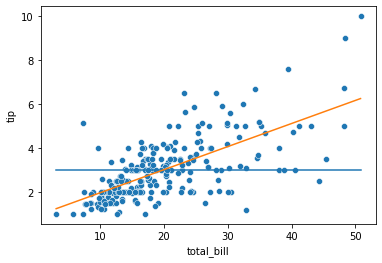

In [7]:
# plot data and prediction line

sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)
sns.lineplot(x = 'total_bill', y = 'baseline', data = tips)
sns.lineplot(x = 'total_bill', y = 'yhat', data = tips)

## 3. Plot the residuals for the linear regression model that you made.

In [9]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


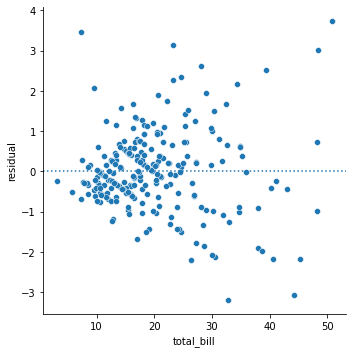

In [11]:
sns.relplot(x = 'total_bill', y = 'residual', data = tips)
plt.axhline(0, ls = ':')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model. 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [12]:
SSE = (tips.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 252.8


In [13]:
SSE_baseline = (tips.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 465.2


In [14]:
#Mean squared error OLS:

MSE = SSE/len(tips)
MSE

1.036019442011377

In [15]:
#Mean squared error of baseline model:

MSE_baseline = SSE_baseline/len(tips)
MSE_baseline

1.906608512496641

In [16]:
# RMSE for the baseline model
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)
RMSE_baseline

1.3807999538298954

In [21]:
# RMSE of OLS model
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
RMSE

1.0178504025697377

In [17]:
# ESS = sum(tips.yhat - tips.tip.mean())**2

ESS = sum((tips.yhat - tips.baseline)**2)
ESS

212.42373319840434

In [18]:
# Total Sum of Errors

TSS = ESS + SSE
TSS

465.21247704918034

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [23]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


## 7. What is the amount of variance explained in your model?



In [26]:
from sklearn.metrics import r2_score
r2_score(tips.tip, tips.yhat)

0.45661658635167657

In [27]:
R2 = ESS/TSS   #Both ways can get R2. 
R2

0.4566165863516764

## 8. Is your model better than the baseline model?

In [30]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error
df_eval['better_than_baseline']
# Yes, it's better than the baseline. 

0    True
1    True
2    True
Name: better_than_baseline, dtype: bool

In [ ]:
9. Create a file named evaluate.py that contains the following functions.

In [31]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [32]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [33]:
better_than_baseline(tips.tip, tips.yhat)

True